# Part I - (Prosper Loan Data Exploration)
## by (Lone B. Tsie)

## Preliminary Wrangling
This document explores a dataset containing attributes of approximately 114 000 loans.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')
loans = df.copy()
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#Overview of data shape and composition
loans.shape

(113937, 81)

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#descriptive statistics of numeric variables
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

There are 113 937 loan entries in the dataset. Most are numeric variables, but variables such as CreditGrade and LoanStatus are categorical in nature, and IncomeRange an ordinal categorical variable.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what determines status of the loan (i.e. canceled, completed or defaulted)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will be looking into whether occupation, income, or the length of loan amount have an effect on the status of the loan.

## Univariate Exploration

Here I'll start looking at the two main variables, income and loan amount.

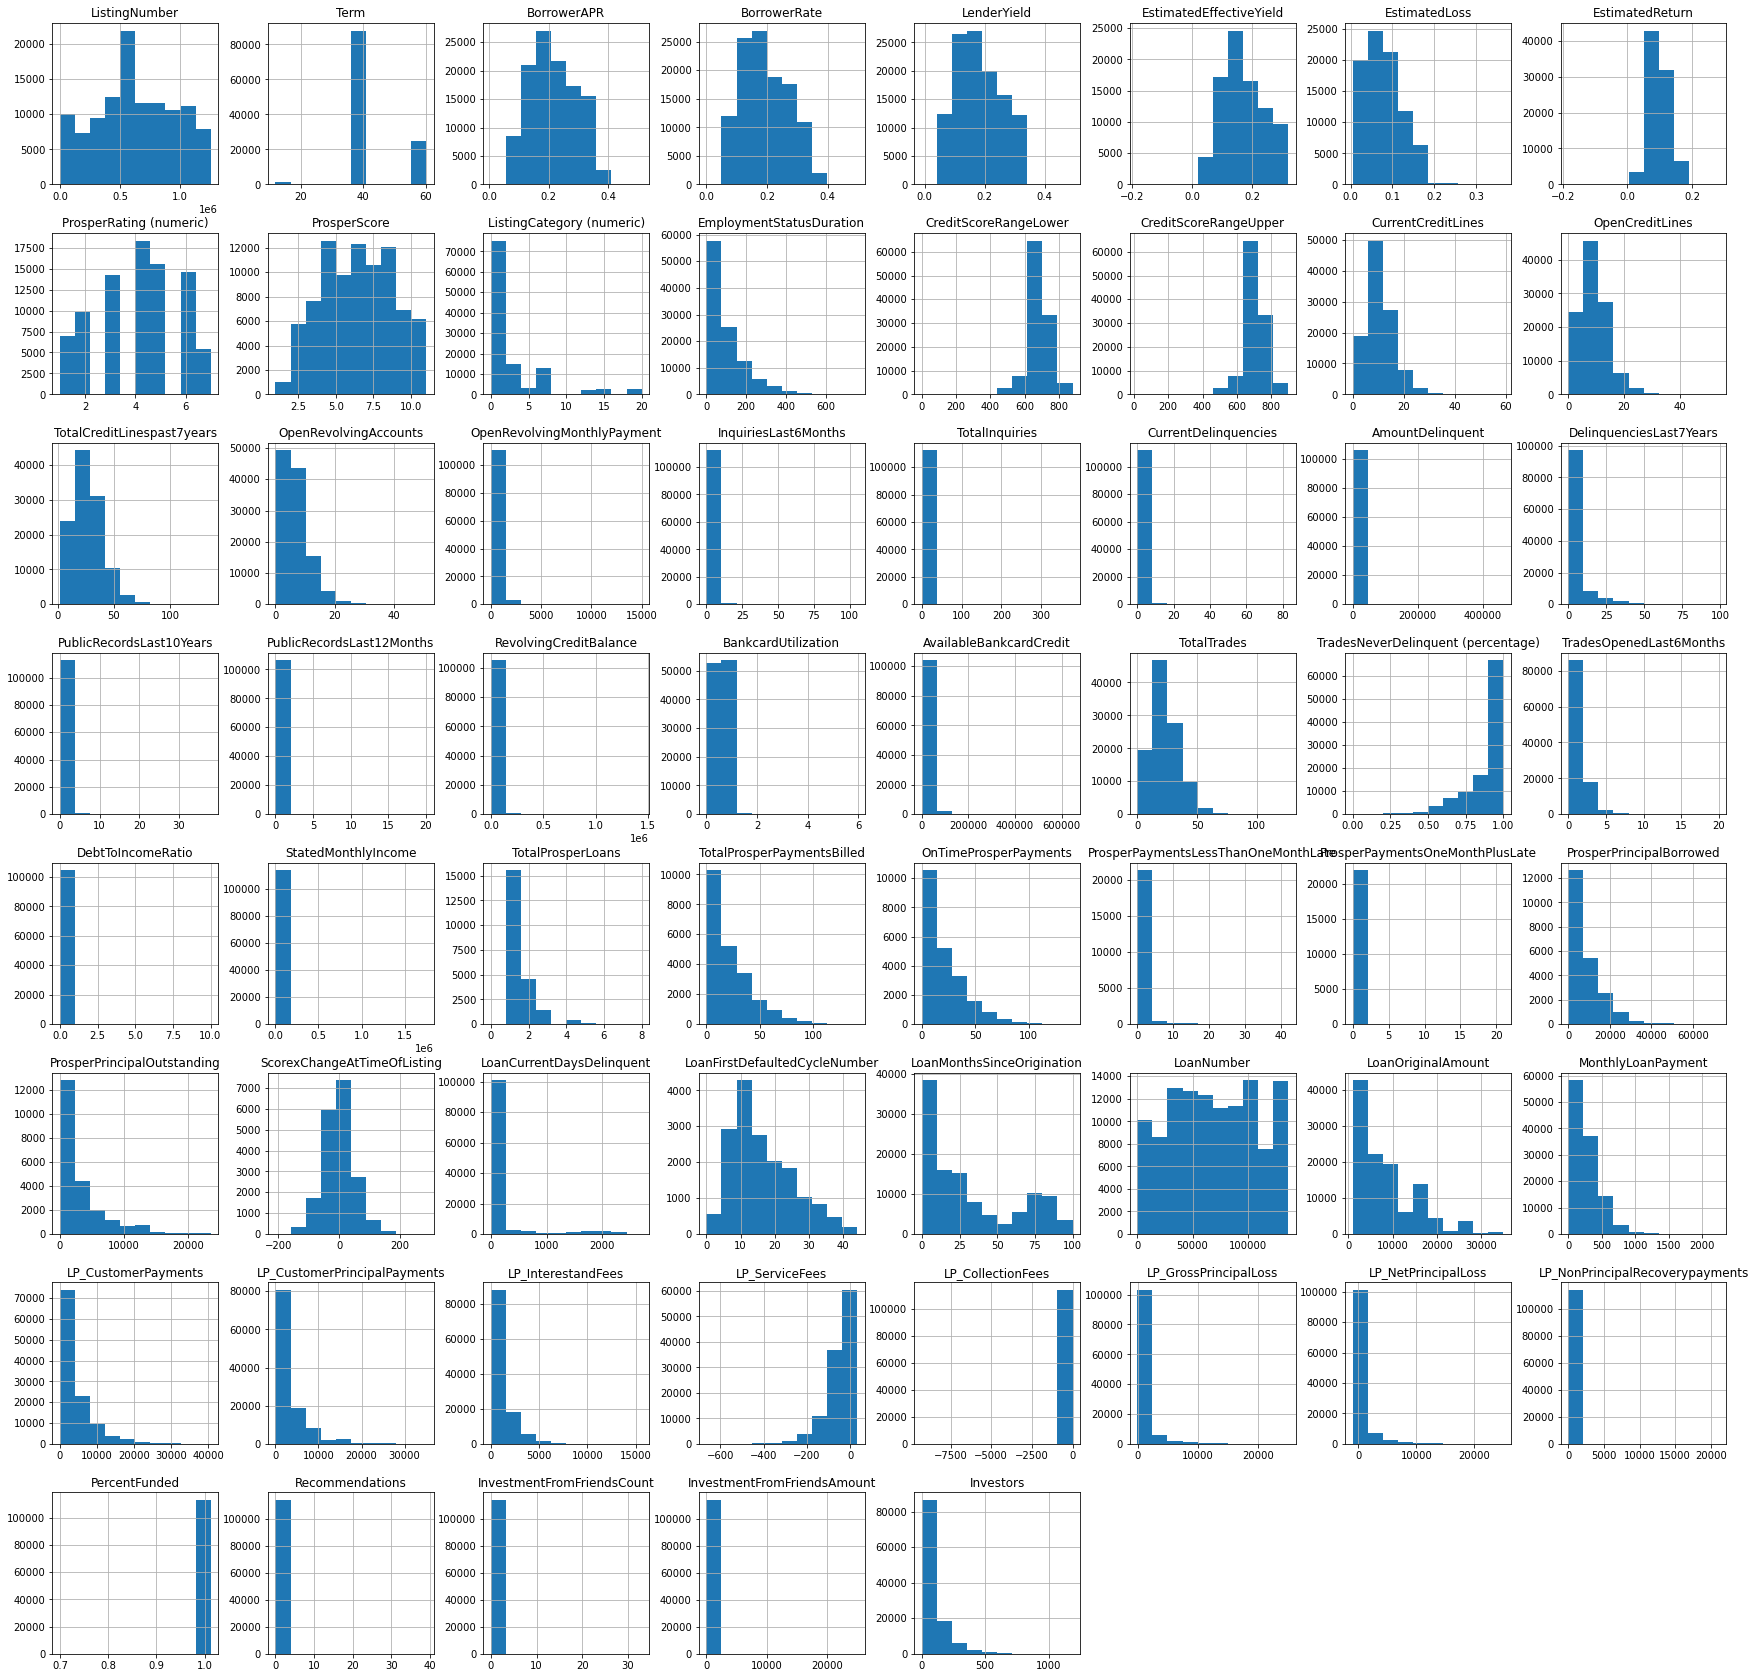

In [7]:
loans.hist(figsize=(30,30));

The set of histograms here is a way to have an overview of all numeric variables, to hav a cursory glance of their distribution

Now to analyse income of loan recipients. First lets find out some information about our variables in questions that show us income in two difference ways.

In [8]:
loans['income']=loans['StatedMonthlyIncome']/10
loans.income.describe()

count    113937.000000
mean        560.802557
std         747.849728
min           0.000000
25%         320.033333
50%         466.666667
75%         682.500000
max      175000.291667
Name: income, dtype: float64

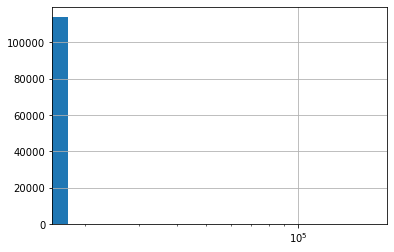

In [9]:
loans.income.hist()
plt.xscale('log')

The histogram of StatedMontlhyIncome did not produce a graph where distribution can be determined, and so another variable will have to be used to indicate income, such as income range.

In [10]:
loans.IncomeRange.describe()
loans.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [14]:
# convert Income Range into ordered categorical types
income_range_var = {'IncomeRange': ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']}
for var in income_range_var:
    income_range_var = pd.api.types.CategoricalDtype(ordered = True, categories = income_range_var[var])
    loans[var] = loans[var].astype(income_range_var)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Not employed'),
  Text(1, 0, '$0'),
  Text(2, 0, '$1-24,999'),
  Text(3, 0, '$25,000-49,999'),
  Text(4, 0, '$50,000-74,999'),
  Text(5, 0, '$75,000-99,999'),
  Text(6, 0, '$100,000+'),
  Text(7, 0, 'Not displayed')])

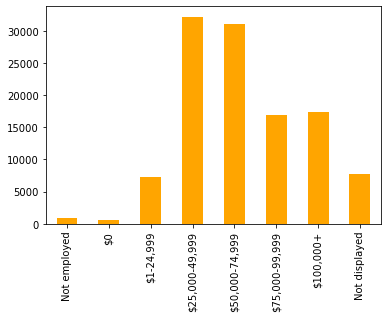

In [15]:
loans["IncomeRange"].value_counts(sort=False).plot(kind="bar", color="orange")
plt.xticks(rotation=90)

The income range of loan recipients is mostly concentrated along those who earn between 25 000 and 100 000, less towards those who earn higher. There are also few that are unemployed or earn 0. This graph gives us more information about income of the loan recipients compared to that of stated income above.

Now we need to understand our next variable LoanOriginalAmount which gives the numeric value of each loan received by the recipients

In [29]:
loans.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

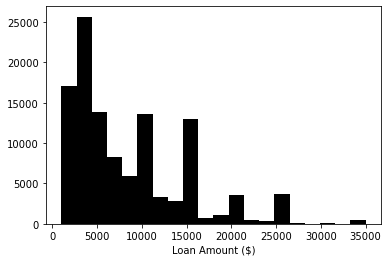

In [30]:
plt.hist(data = loans, x = 'LoanOriginalAmount', color = 'black', bins = 20)
plt.xlabel('Loan Amount ($)')
plt.show()

Loan amount here seems to have spikes in frequency of the loan amount around multiples of 5000, possibly because the loans are arranged that way and are rarely customized to specific amounts, i.e. 5 000, 10 000, 15 000.


I'll now look at other variables of interest that might shed some light on the features of loan recipients.

Our next variable of interest is in relation to when the loans were aquired. The variable of choice here is a combination of loanoriginationquarter which gives the year and quarter of the year. This will hopefully allow us to categorize the loans based on year.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Q3 2007'),
  Text(1, 0, 'Q1 2014'),
  Text(2, 0, 'Q1 2007'),
  Text(3, 0, 'Q4 2012'),
  Text(4, 0, 'Q3 2013'),
  Text(5, 0, 'Q4 2013'),
  Text(6, 0, 'Q2 2013'),
  Text(7, 0, 'Q2 2012'),
  Text(8, 0, 'Q4 2007'),
  Text(9, 0, 'Q3 2006'),
  Text(10, 0, 'Q1 2013'),
  Text(11, 0, 'Q2 2010'),
  Text(12, 0, 'Q1 2012'),
  Text(13, 0, 'Q3 2012'),
  Text(14, 0, 'Q4 2010'),
  Text(15, 0, 'Q4 2011'),
  Text(16, 0, 'Q3 2008'),
  Text(17, 0, 'Q2 2007'),
  Text(18, 0, 'Q4 2006'),
  Text(19, 0, 'Q2 2011'),
  Text(20, 0, 'Q1 2011'),
  Text(21, 0, 'Q1 2008'),
  Text(22, 0, 'Q3 2009'),
  Text(23, 0, 'Q3 2011'),
  Text(24, 0, 'Q2 2008'),
  Text(25, 0, 'Q1 2010'),
  Text(26, 0, 'Q4 2009'),
  Text(27, 0, 'Q2 2006'),
  Text(28, 0, 'Q3 2010'),
  Text(29, 0, 'Q1 2006'),
  Text(30, 0, 'Q4 2008'),
  Text(31, 0, 'Q4 2005'),
  Text(32, 0, 'Q2 2009')])

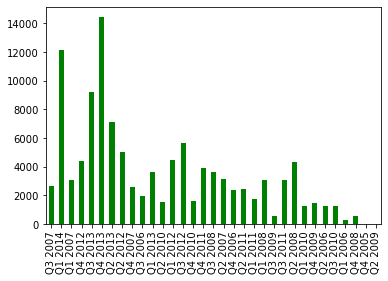

In [31]:
loans.LoanOriginationQuarter.describe()
loans["LoanOriginationQuarter"].value_counts(sort=False).plot(kind="bar", color="green")
plt.xticks(rotation=90)

Our other option was to use the original date and to analyse this variable to see if its useful to our investigation

In [32]:
loans["LoanOriginationDate"].describe()

count                  113937
unique                   1873
top       2014-01-22 00:00:00
freq                      491
Name: LoanOriginationDate, dtype: object

It appears using this variable might be too cumbersome at the moment and the previous variable bodes well for the insights we are looking for

However since loanoriginalqaurter is concated with year and quarter, for further analysis we will separate them

<AxesSubplot:>

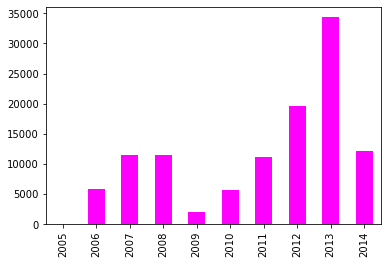

In [3]:
new = loans["LoanOriginationQuarter"].str.split(" ", n = 1, expand = True)
loans["quarter"]= new[0]
loans["year"]= new[1]
loans["year"].value_counts(sort=True).sort_index(ascending=True).plot(kind="bar", color="magenta")

Now we can find insights with our wrangled data and categorise it better

In [34]:
# convert year quarter into ordered categorical types
year_var = {'year': ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']}
for var in year_var:
    year_var = pd.api.types.CategoricalDtype(ordered = True, categories = year_var[var])
    loans[var] = loans[var].astype(year_var)

<AxesSubplot:>

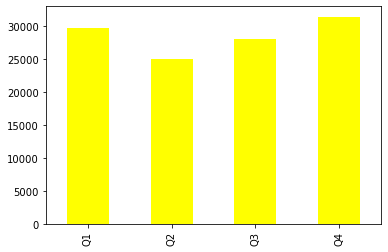

In [35]:
loans["quarter"].value_counts(sort=True).sort_index(ascending=True).plot(kind="bar", color="yellow")


In [36]:
# convert year quarter into ordered categorical types
q_var = {'quarter': ['Q1','Q2','Q3','Q4']}
for var in q_var:
    q_var = pd.api.types.CategoricalDtype(ordered = True, categories = q_var[var])
    loans[var] = loans[var].astype(q_var)

Loan-Original-Qaurter had information about when the loan was taken up, based on year and the quarter. Most loans were taken up in 2013, following an incline from 2009. From first inspection, q4 has the highest loans but not my much.

Our next line of questioning is whether there is certain loan statuses that have been more favorable, that is what happens with these loans once aquired.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Completed'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Past Due (1-15 days)'),
  Text(3, 0, 'Defaulted'),
  Text(4, 0, 'Chargedoff'),
  Text(5, 0, 'Past Due (16-30 days)'),
  Text(6, 0, 'Cancelled'),
  Text(7, 0, 'Past Due (61-90 days)'),
  Text(8, 0, 'Past Due (31-60 days)'),
  Text(9, 0, 'Past Due (91-120 days)'),
  Text(10, 0, 'FinalPaymentInProgress'),
  Text(11, 0, 'Past Due (>120 days)')])

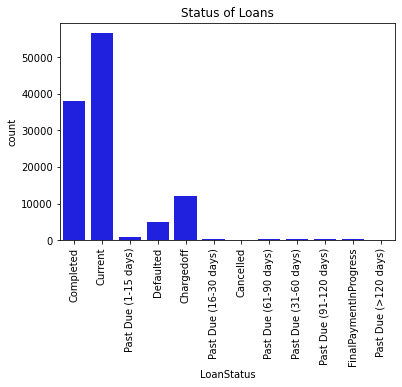

In [37]:
statuses = loans.LoanStatus.value_counts()
statuses
sb.countplot(data = loans, x = 'LoanStatus', color = 'blue')
plt.title('Status of Loans')

plt.xticks(rotation=90)

Another variable of interest is credit score. Does the credit score determine how much money one gets?

In [38]:
loans.CreditScoreRangeLower.describe()

count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

Text(0.5, 1.0, 'Credit score distribution')

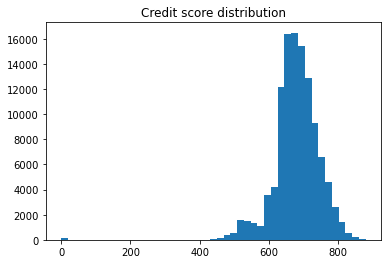

In [39]:
plt.hist(data = loans, x = 'CreditScoreRangeLower', bins = 45);
plt.title('Credit score distribution')


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

LoanOriginationQuarter variable was able to be transformed into two columns for year and quarter allowing separate analysis

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

StatedMonthlyIncome variable was not able to get information on it using histogram, even after transformation by log and was later dropped because of this, and income range used instead.

## Bivariate Exploration

To start off with, I would like to investigate the relationships between my data and possible correlation.

In [40]:
numeric_variables = ['LoanOriginalAmount', 'CreditScoreRangeLower', 'MonthlyLoanPayment','StatedMonthlyIncome']

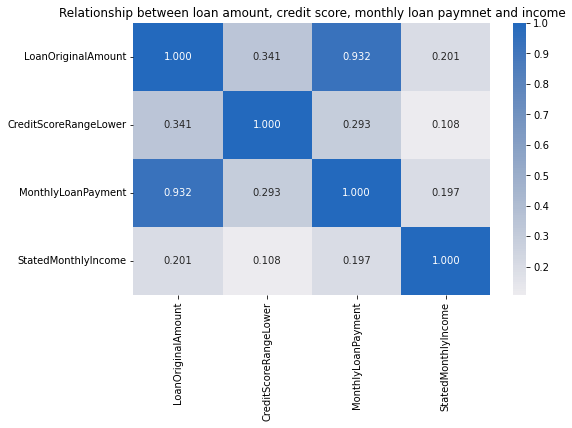

In [41]:
plt.figure(figsize = [8, 5])
sb.heatmap(loans[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship between loan amount, credit score, monthly loan paymnet and income')
plt.show()

There is .9 correlation between loan amount and monthly payment, which is expected but important to be sure of. 

Although positive, (0.3) there is very little correlation between credit and loan amount which was not expected as a credit score is used to determine the line of credit someone receives

Surprisingly too, there is a positive but ow correlation of 0.2 between income and loan amount, which now creates a question of do banks determine how much to give in loans of not the persons interest.

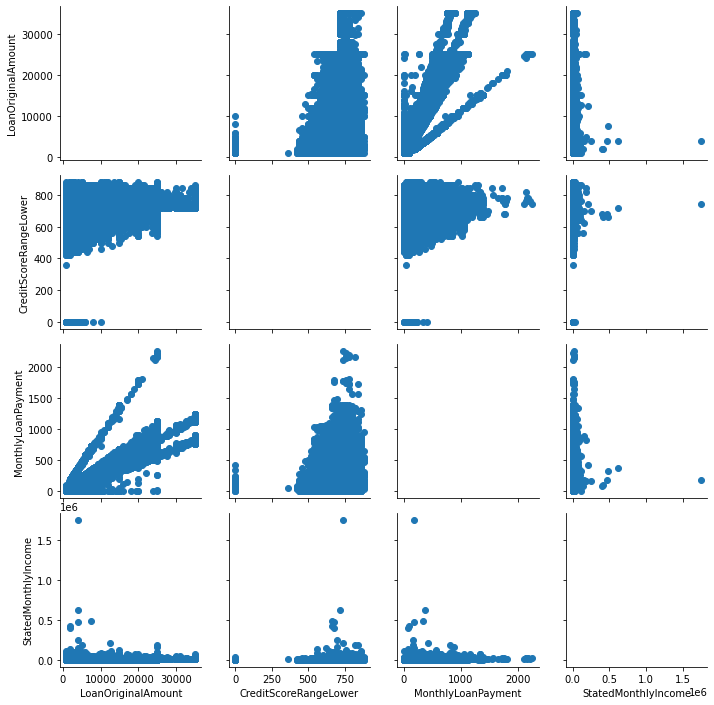

In [42]:
theta = sb.PairGrid(data = loans, vars = numeric_variables)
theta.map_offdiag(plt.scatter)

This scatter graph was used to give an overview of possible relationships between the variables and confirm correlation, to see which variables to continue to compare against.

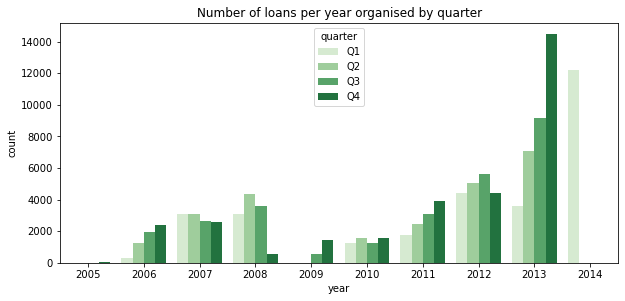

In [43]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10, 15])

# subplot 1: year vs quarter
plt.subplot(3, 1, 1)
sb.countplot(data = loans, x = 'year', hue = 'quarter', palette = 'Greens')
plt.title('Number of loans per year organised by quarter')
plt.show()

Here you can see that as the years went by the number of loans given increased with a drastic drop in 2009. This could possibly be due to the recession. Also it appears more loans are aquired in the fourth quarter in years after the 2009 dip.

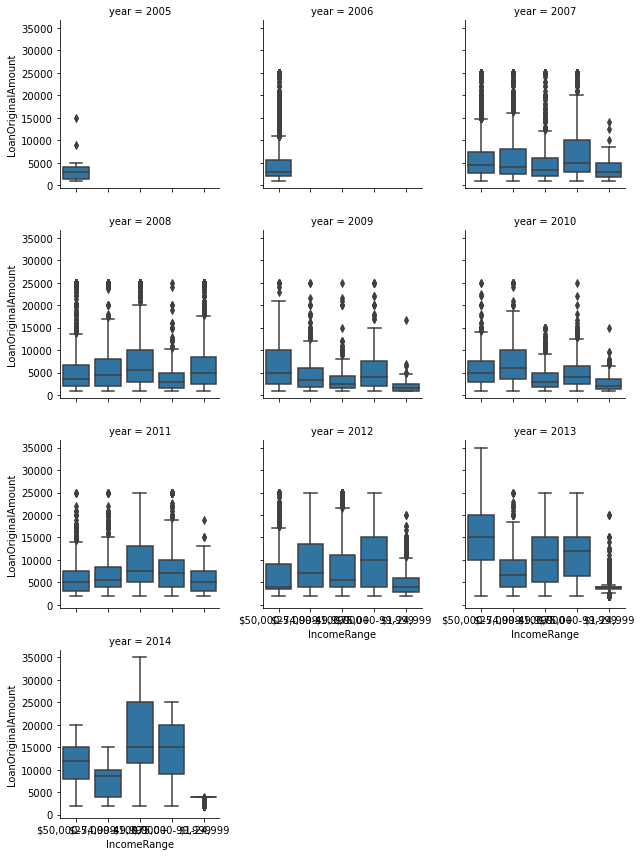

In [5]:
# plot the categorical variables
box = sb.FacetGrid(data = loans, col = 'year', col_wrap =3, col_order=["2005", "2006",'2007','2008','2009','2010','2011','2012','2013','2014'])
box.map(sb.boxplot, 'IncomeRange', 'LoanOriginalAmount')
plt.xticks(rotation=90)

The faceted box plot suggests theres a slight interaction between the years, where from year 2010 after the recession, the loan amount seems to increase based on the income range.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the graphs above, it appears there may be very low correlation between income and loan or credit score which was surprising.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Furthermore, it is clear there is a positive correlation between monthly payment as well as loan amount. It is also clear to see a drop in loans at the end of 2008 and 2009 and continued to be low till 2011. Possibly due to the recession at the time.

## Multivariate Exploration

The main thing to explore here is credit score on the status of loan as well as loan amount

In [45]:
loans_def = (loans['LoanStatus'] == 'Defaulted')
loans_1c = loans.loc[loans_def,:]

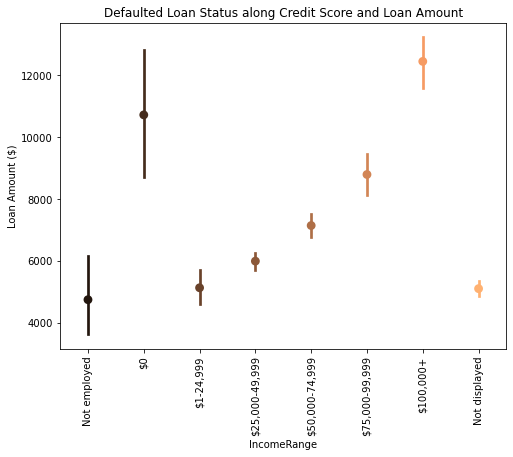

In [46]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans_1c, x = 'IncomeRange', y = 'LoanOriginalAmount',
           palette = 'copper', linestyles = '')
plt.title('Defaulted Loan Status along Credit Score and Loan Amount')
plt.ylabel('Loan Amount ($)')
plt.xticks(rotation=90)
plt.show();

Here you can see that there is influence of income and credit score on the loan amount for those who have defaulted on their loans. The outliers are for those who are earning $0 or have not displayed their income.

In [47]:
loans_com = (loans['LoanStatus'] == 'Completed')
loans_2c = loans.loc[loans_com,:]

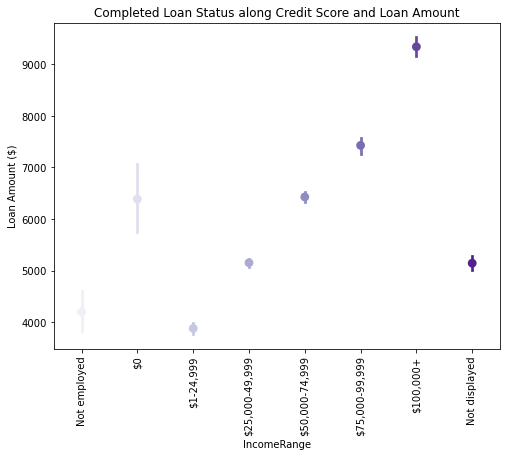

In [48]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans_2c, x = 'IncomeRange', y = 'LoanOriginalAmount',
           palette = 'Purples', linestyles = '')
plt.title('Completed Loan Status along Credit Score and Loan Amount')
plt.ylabel('Loan Amount ($)')
plt.xticks(rotation=90)
plt.show();

Here there also seems to be some influence on completion of loan paymnets, based on the income and loan amount.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Income range seems to have a correlation between those who complete their loan payment and those default on the loans. It also appears that there is not significant relationship between credit score, and the loan amount received.

### Were there any interesting or surprising interactions between features?

Expected relationships were found between loan amount and loan payment. There being a small positive correlation between credit score and loan amount was surprising as it may be assumed that this is a factor on the amount of loan available to customers.

## Conclusions
It appears that after exploratory analysis, the status of the loan focusing on completing and defaulted are correlated positive to income. This suggests those who those who earn more are more likely to pay off the loan and also default. This suggest something other than income determines loan status. Furthermore it is clear that credit score wasn't used as a market for the size of loan and that the number of loans given per year are dependent on market conditions such as the recession.
